In [ ]:
# Libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/mnt/data.csv')
df.sample(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
275,2016,10,19,Wed,60,61,58.4,58,58,60,57,41
45,2016,2,17,Wed,55,56,50.0,57,45,51,49,46
116,2016,4,29,Fri,61,64,61.2,61,61,65,61,49
331,2016,12,15,Thurs,40,39,45.3,39,45,49,47,46
237,2016,9,11,Sun,74,77,72.1,70,69,75,71,70


In [ ]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [ ]:
# onehot encoding
df = pd.get_dummies(df, dtype='uint8')
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [ ]:
labels = np.array(df['actual'])
labels

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

**# Train/test splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['actual']), labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_test.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (87,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


**# Model Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

**# Preparing forecast**

In [ ]:
predictions = rf.predict(X_test)
err = abs(predictions - Y_test)
print(f'MAE: {round(np.mean(err), 2)}')

MAE: 3.87


**# Performance Evaluating**

In [ ]:
# Mean Absolute Percentage Error (MAPE)
mape = 100 * (err/Y_test)
acc = 100 - np.mean(mape)
print(f'Accuracy: {round(acc, 2)} %.')

Accuracy: 93.93 %.


**# Tree Visualizing**

In [ ]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5]
# to dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(df.drop(columns = ['actual'], axis = 1).columns), rounded = True, precision = 1 )
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

**# Full Tree**

(np.float64(-0.5), np.float64(12444.5), np.float64(1883.5), np.float64(-0.5))

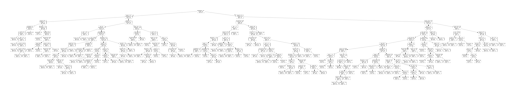

In [40]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('/content/tree.png')
imshow(img)
plt.axis('off')

**# Small Tree**

In [44]:
rf_small = RandomForestRegressor(n_estimators = 10, max_depth = 3)
rf_small.fit(X_train, Y_train)
small_tree = rf_small.estimators_[5]
export_graphviz(small_tree, out_file = 'small_tree.dot', feature_names = df.drop(columns = ['actual'], axis = 1).columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

(np.float64(-0.5), np.float64(1676.5), np.float64(496.5), np.float64(-0.5))

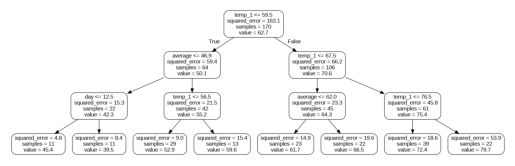

In [45]:
img = mpimg.imread('/content/small_tree.png')
imshow(img)
plt.axis('off')

**# Variable Importance**

In [47]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.drop(columns = ['actual'], axis = 1), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


Text(0.5, 1.0, 'Variable Importances')

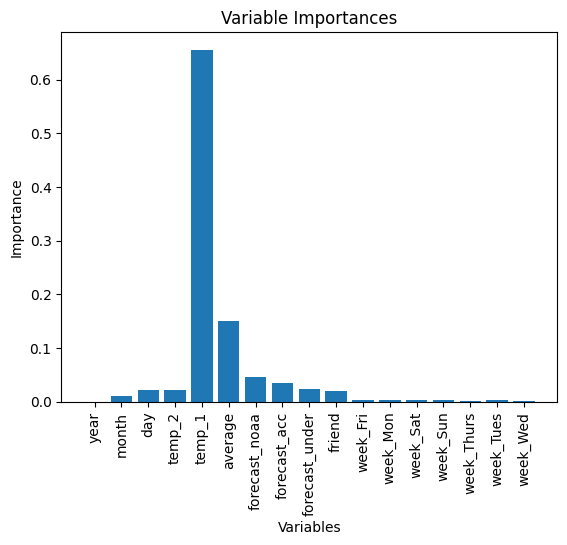

In [49]:
from ast import increment_lineno
x_values = list(range(len(importances)))
# making bar chart
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, df.drop(columns = ['actual'], axis = 1), rotation = 'vertical')
plt.ylabel('Importance');
plt.xlabel('Variables')
plt.title('Variable Importances')

**# Getting the two-most important features**

In [56]:
rf_most_important = RandomForestRegressor(n_estimators = 1000, random_state = 42)
important_indices = ['temp_1', 'average']
train_important = X_train[important_indices]
test_important = X_test[important_indices]

rf_most_important.fit(train_important, Y_train)

preds = rf_most_important.predict(test_important)
err = abs(preds-Y_test)

print(f'MAE: {round(np.mean(err), 2)} degrees')
mape = np.mean(100 * (err/Y_test))
acc = 100 - mape
print(f'Accuracy: {acc:.2f} %')

MAE: 3.92 degrees
Accuracy: 93.76 %
